In [26]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


In [95]:
file_path = 'corpus_all.txt'  # Replace with the actual path to your text file

lines = []  # Empty list to store the lines

try:
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            lines.append(line.strip())  # Append the line to the list, removing any leading/trailing whitespace

except FileNotFoundError:
    print("File not found. Please check the file path and try again.")

#file_path = 'corpus_all.txt'  # Replace with the actual path to your text file
first_words = []  # Empty list to store the first words

try:
    for line in lines:
        words = line.strip().split()  # Split the line into words
        if words:
            first_word = words[0]  # Get the first word
            first_words.append(first_word)  # Append the first word to the list

except FileNotFoundError:
    print("File not found. Please check the file path and try again.")


# Define the status levels
status_levels = ["happy","angry","fear","disgust","sad","surprise",]

# Initialize a list to store the extracted status levels and sentences
extracted_data = []

# Iterate over the texts
for text in lines:
    # Initialize variables to store the extracted status level and sentence
    status = ""
    sentence = ""

    # Iterate over the status levels
    for level in status_levels:
        if level in text:
            # Split the text based on the status level
            split_text = text.split(level, 1)

            # Extract the status level and sentence
            status = level
            sentence = split_text[1].strip()
            break

    # Append the extracted status level and sentence to the list
    extracted_data.append({"Status": status, "Sentence": sentence})
    
dataset = pd.DataFrame(extracted_data)

In [96]:
dataset

,Status,Sentence
0,sad,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা..."
1,sad,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...
2,angry,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...
3,happy,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধ...
4,angry,রাতের বেলা আবার কিসের সকাল।
...,...,...
6284,surprise,ভারতে প্রতিদিন ১৮ টা রেপ কেইস এন্ট্রি হয়
6285,surprise,এই কি স্বাধীন দেশ
6286,sad,স্বাধীন দেশের নাগরিক হয়ে ও আজ আমরা পরাধীন।
6287,angry,চুদলাম দাদা পয়সা নাই


In [97]:
nltk.download('punkt')
nltk.download('stopwords')

# Replace with Bengali stopwords
bengali_stopwords = set(["এই", "কি", "হয়"])

# Assuming your DataFrame is called 'df'
X = dataset['Sentence']
y = dataset['Status']

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [t.lower() for t in tokens if t.isalpha() and t not in bengali_stopwords]
    return " ".join(tokens)

# Apply preprocessing to the sentences
X_preprocessed = X.apply(preprocess_text)

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X_preprocessed)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pinash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pinash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [127]:
X_vectorized.shape

(6289, 1162)

In [99]:
# Split the data into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [128]:
X_train.shape

(5031, 1162)

In [129]:
X_test.shape

(1258, 1162)

In [100]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [101]:
# Predict on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.3386327503974563
              precision    recall  f1-score   support

       angry       0.28      0.19      0.22       268
     disgust       0.15      0.01      0.03       141
        fear       0.42      0.08      0.13        66
       happy       0.37      0.81      0.50       391
         sad       0.28      0.19      0.22       278
    surprise       0.00      0.00      0.00       114

    accuracy                           0.34      1258
   macro avg       0.25      0.21      0.18      1258
weighted avg       0.27      0.34      0.26      1258



# Apply SMOTE 

In [89]:

# Assuming you have loaded your dataset into a pandas DataFrame named 'df'
# X should contain the features (in this case, the 'Sentence' column) and y should contain the target class labels (the 'Status' column)
X = dataset['Sentence']
y = dataset['Status']

# Create a TfidfVectorizer to convert text to numerical features
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Create an instance of the SMOTE class
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples for the minority class (fear)
X_resampled, y_resampled = smote.fit_resample(X_vectorized, y)

# Convert the resampled data back to a DataFrame
df = pd.DataFrame({'Status': y_resampled, 'Sentence': X_resampled})

In [90]:
df

,Status,Sentence
0,sad,"(0, 3085)\t0.04325065094600315\n (0, 2863)\..."
1,sad,"(0, 1527)\t0.13503058341724922\n (0, 3140)\..."
2,angry,"(0, 2695)\t0.36675405908123854\n (0, 3283)\..."
3,happy,"(0, 1078)\t0.3174361850159315\n (0, 1700)\t..."
4,angry,"(0, 3139)\t0.815637800513949\n (0, 1157)\t0..."
...,...,...
11425,surprise,"(0, 3221)\t0.17982368306812407\n (0, 2893)\..."
11426,surprise,"(0, 2844)\t0.28862964104909306\n (0, 1868)\..."
11427,surprise,"(0, 1543)\t0.23329132119279034\n (0, 1097)\..."
11428,surprise,"(0, 3314)\t0.020292737135870875\n (0, 2655)..."


In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Assuming you have already processed the dataset and stored it in a DataFrame called 'df'
# X should be dense numerical arrays representing the features
x_new = df['Sentence'].astype(str).tolist()  # Assuming the "Sentence" column contains dense numerical arrays

y_new = df['Status']



In [103]:

X_vectorized_new = vectorizer.fit_transform(x_new)


In [126]:
X_vectorized_new.shape

(11430, 102394)

In [114]:
# Split the data into training and testing sets (80% train, 20% test)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_vectorized_new, y_new, test_size=0.2, random_state=42)

In [120]:
X_train_new.shape

(9144, 102394)

In [130]:
X_test_new.shape

(2286, 102394)

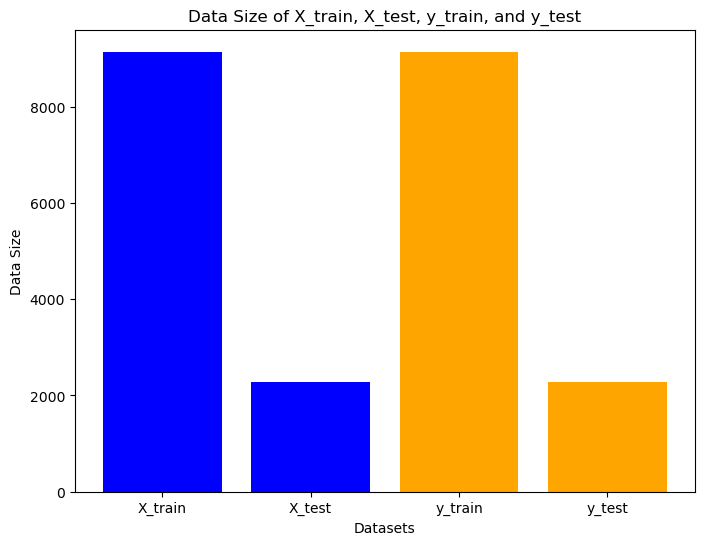

In [122]:
import matplotlib.pyplot as plt

# Data sizes
X_train_size = X_train_new.shape[0]
X_test_size = X_test_new.shape[0]
y_train_size = len(y_train_new)
y_test_size = len(y_test_new)

# Data labels
data_labels = ['X_train', 'X_test', 'y_train', 'y_test']

# Data sizes
data_sizes = [X_train_size, X_test_size, y_train_size, y_test_size]

# Creating the bar chart
plt.figure(figsize=(8, 6))
plt.bar(data_labels, data_sizes, color=['blue', 'blue', 'orange', 'orange'])
plt.xlabel('Datasets')
plt.ylabel('Data Size')
plt.title('Data Size of X_train, X_test, y_train, and y_test')
plt.show()


In [123]:
# Initialize the SVM model
svm_model_new = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model
svm_model_new.fit(X_train_new, y_train_new)

SVC(kernel='linear', random_state=42)

In [131]:
# Predict on the test set
y_pred_new = svm_model_new.predict(X_test_new)


In [132]:

# Calculate accuracy
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print(f"Accuracy: {accuracy_new}")

# Print classification report
print(classification_report(y_test_new, y_pred_new))

Accuracy: 0.5406824146981627
              precision    recall  f1-score   support

       angry       0.46      0.51      0.48       384
     disgust       0.48      0.45      0.46       388
        fear       0.70      0.76      0.73       374
       happy       0.61      0.50      0.55       390
         sad       0.44      0.43      0.44       393
    surprise       0.56      0.62      0.59       357

    accuracy                           0.54      2286
   macro avg       0.54      0.54      0.54      2286
weighted avg       0.54      0.54      0.54      2286

